### Familiarising myself with datasets

In [1]:
import pandas as pd
import numpy as np

ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

In [2]:
# Sense-check 

print(ad.columns)
print(ar.columns)
print(nc.columns)

print(ad.info())
print(ar.info())
print(nc.info())


Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 n

In [3]:
# Determine whether there are missing values.

missing_values_ad = ad.isnull().sum()
print("Missing values in actual_duration DataFrame:")
print(missing_values_ad)

missing_values_ar = ar.isnull().sum()
print("\nMissing values in appointments_regional DataFrame:")
print(missing_values_ar)

missing_values_nc = nc.isnull().sum()
print("\nMissing values in national_categories DataFrame:")
print(missing_values_nc)


Missing values in actual_duration DataFrame:
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

Missing values in appointments_regional DataFrame:
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

Missing values in national_categories DataFrame:
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [4]:
# Determine the metadata of the data set.

print("Metadata for actual_duration DataFrame:")
ad.info()

print("\nMetadata for appointments_regional DataFrame:")
ar.info()

print("\nMetadata for national_categories DataFrame:")
nc.info()


Metadata for actual_duration DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB

Metadata for appointments_regional DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------        

In [5]:
# Descriptive statistics

print(ad.describe())  
print(ar.describe())  
print(nc.describe())


       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000
       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000
                    appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:00               1.000000
25%              2021-10-25 00:00:00               7.000000
50%              2022-01-18 00:00:00              25.000000
75%              2022-04-07 00:00:00             128.000000
max              2022-06-30 00:00:00           16590.00000

In [6]:
# How many locations are there in the data set

print("Number of unique locations in ad: ", ad['sub_icb_location_ons_code'].nunique())
print("Number of unique locations in ar: ", ar['icb_ons_code'].nunique())


Number of unique locations in ad:  106
Number of unique locations in ar:  42


In [7]:
# What locations have the most appointments

top_5_locations = ar['icb_ons_code'].value_counts().head(5)
print("Top 5 locations with the most appointments:\n", top_5_locations)


Top 5 locations with the most appointments:
 icb_ons_code
E54000057    54527
E54000008    48253
E54000050    43774
E54000048    36360
E54000051    31069
Name: count, dtype: int64


In [8]:
# Count of the service settings, context types, national categories, and appointment statuses

print("Number of unique service settings: ", nc['service_setting'].nunique())
print("Number of unique context types: ", nc['context_type'].nunique())
print("Number of unique national categories: ", nc['national_category'].nunique())
print("Number of unique appointment statuses: ", ar['appointment_status'].nunique())


Number of unique service settings:  5
Number of unique context types:  3
Number of unique national categories:  18
Number of unique appointment statuses:  3


In [9]:
# Missed appointments

missed_appointments = ar[ar['appointment_status'] == 'DNA'] 

# percentage of missed appointments
total_appointments = len(ar)
missed_appointments_count = len(missed_appointments)
percentage_missed = (missed_appointments_count / total_appointments) * 100

print(f"Percentage of missed appointments: {percentage_missed:.2f}%")


Percentage of missed appointments: 27.37%


COMMENTS ON DATA QUALITY

The quality of data is good, with no missing values. However there is a different dictionary used for each county

148 different locations. 

Greater machester, Cheshire and Merseyside, North East and North Cumbria, Lancashire and South Cumbria, and 
Humber and North Yorkshire are the busiest in that order. The north seems to have a lot more appointments in the uk

27.37% of appointments missed

# 

### Between what dates were appointments scheduled? 

In [10]:
# View the first five rows of appointment_date for ad
print(ad['appointment_date'].head())

# View the first five rows of appointment_date for ar
print(ar['appointment_month'].head())


0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object
0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [11]:
# Convert the appointment_date column in ad to datetime
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], errors='coerce')

# Convert the appointment_date column in ar to datetime
ar['appointment_date'] = pd.to_datetime(ar['appointment_month'], errors='coerce')

# View the DataFrames to ensure the conversion was successful
print(ad.head())
print(ar.head())


  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       

C:\Users\gianf\AppData\Local\Temp\ipykernel_21068\3924482689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], errors='coerce')


In [71]:
# Determine the minimum and maximum dates in the ad DataFrame
min_date_ad = ad['appointment_date'].min()
max_date_ad = ad['appointment_date'].max()
print(f"The appointments in the 'ad' file are scheduled between {min_date_ad} and {max_date_ad}.")

# Determine the minimum and maximum dates in the ar DataFrame (using appointment_month)
min_date_ar = ar['appointment_month'].min()
max_date_ar = ar['appointment_month'].max()
print(f"The appointments in the 'ar' file are scheduled between {min_date_ar} and {max_date_ar}.")


The appointments in the 'ad' file are scheduled between 2021-12-01 00:00:00 and 2022-06-30 00:00:00.
The appointments in the 'ar' file are scheduled between 2020-01 and 2022-06.


### Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [70]:
# Filter nc for the desired date range/location
nc_filtered = nc[(nc['appointment_date'] >= '2022-01-01') &
                 (nc['appointment_date'] <= '2022-06-01') &
                 (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]


    # Group by 'service_setting' and sum the 'count_of_appointments'
service_setting_popularity = nc_filtered.groupby('service_setting')['count_of_appointments'].sum()

print(f"The most popular service setting for NHS North West London from 1 January to 1 June 2022 was '{most_popular_service_setting}' with {most_popular_service_count} appointments.")

NameError: name 'most_popular_service_setting' is not defined

In [ ]:
# total service setting popularity

print(service_setting_popularity)

### Which month had the highest number of appointments?

In [69]:
# Group the data by appointment_month and sum the count_of_appointments for each month
appointments_per_month = ar.groupby('appointment_month')['count_of_appointments'].sum()

# results in descending order to find  month with the highest num of appointments
sorted_appointments_per_month = appointments_per_month.sort_values(ascending=False)

# View the results to see which month had the highest number of appointments
print(sorted_appointments_per_month)

# top month printed
top_month = sorted_appointments_per_month.idxmax()
max_appointments = sorted_appointments_per_month.max()
print(f"The month with the highest number of appointments is {top_month} with {max_appointments} appointments.")


appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2020-10    28301932
2022-05    27495508
2021-03    27225424
2020-01    27199296
2021-06    26784182
2020-09    26714255
2022-06    25828078
2021-07    25739219
2022-01    25635474
2022-02    25355260
2021-12    25140776
2020-11    25061602
2020-02    24104621
2020-03    24053468
2022-04    23913060
2021-04    23879932
2021-08    23852171
2020-12    23535936
2021-05    23508395
2021-01    22492069
2020-07    22491437
2021-02    22399569
2020-06    20690805
2020-08    20150520
2020-05    16417212
2020-04    16007881
Name: count_of_appointments, dtype: int64
The month with the highest number of appointments is 2021-11 with 30405070 appointments.


### What was the total number of records per month?

In [68]:
# Group the data by appointment_month and count the number of records per month
records_per_month = ar.groupby('appointment_month').size()

# View the result to see the total number of records per month
print(records_per_month)


appointment_month
2020-01    20889
2020-02    20689
2020-03    21350
2020-04    19124
2020-05    18338
2020-06    18844
2020-07    19502
2020-08    19247
2020-09    20043
2020-10    20122
2020-11    19675
2020-12    19394
2021-01    19319
2021-02    18949
2021-03    19369
2021-04    19452
2021-05    19384
2021-06    19814
2021-07    19899
2021-08    19786
2021-09    20441
2021-10    20562
2021-11    20766
2021-12    20393
2022-01    20225
2022-02    20133
2022-03    20532
2022-04    20073
2022-05    20276
2022-06    20231
dtype: int64


SUMMARY

Q1:
    1. Identified the format of the dates, then converting the required column to 'datetime' format to ensure it was correctly recognized as a date.
    2. Used the 'min' and 'max' functions to determine the first and last appointment dates in both the 'ad' and 'ar' files.
Further questions: What periods had more/less appointments?

Q2:
    1. Filtered the data to only include NHS North West London data.
    2. Filtered data from a specific time.
    3. Grouped the data by service setting then printed the most popular, along with the rest of the values.
Further questions: What contributed to the popularity of the service setting?
                   Across other time periods does this result hold true?
 
Q3:
    1. Grouped data by 'appointment_month'
    2. Found the sum of 'count_of_appointment' to find the total appointments for each month.
    3. Sorted data descending in order to find the month with the highest sum. Also printed the date and amount of the highest.
Further questions: What are the reasons behind the month being so busy? e.g. seasonal, health campaign.

Q4:
    1. Grouped the 'ar' data by 'appointment_month', using 'size' to count the number of records per month.
Further questions: N/A

# 

### Creating visualisations and identifying possible monthly and seasonal trends in the data.

In [16]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Creating three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [17]:
# Change the data type of the appointment month to string to allow for easier plotting.

nc['appointment_month'] = nc['appointment_month'].astype(str)
ad['appointment_month'] = ad['appointment_month'].astype(str)
ar['appointment_month'] = ar['appointment_month'].astype(str)


In [18]:
# Aggregate on monthly level and determine the sum of records per month.

monthly_appointments_ad = ad.groupby('appointment_date')['count_of_appointments'].sum().reset_index()
monthly_appointments_ar = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
monthly_appointments_nc = nc.groupby('appointment_date')['count_of_appointments'].sum().reset_index()


# View output.

print(monthly_appointments_ad)
print(monthly_appointments_ar)
print(monthly_appointments_nc)


    appointment_date  count_of_appointments
0         2021-12-01                1156233
1         2021-12-02                1143290
2         2021-12-03                1109114
3         2021-12-04                  75938
4         2021-12-05                   9693
..               ...                    ...
207       2022-06-26                   5540
208       2022-06-27                1297442
209       2022-06-28                1220805
210       2022-06-29                1130637
211       2022-06-30                1121864

[212 rows x 2 columns]
   appointment_month  count_of_appointments
0            2020-01               27199296
1            2020-02               24104621
2            2020-03               24053468
3            2020-04               16007881
4            2020-05               16417212
5            2020-06               20690805
6            2020-07               22491437
7            2020-08               20150520
8            2020-09               26714255
9       

**Service settings:**

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


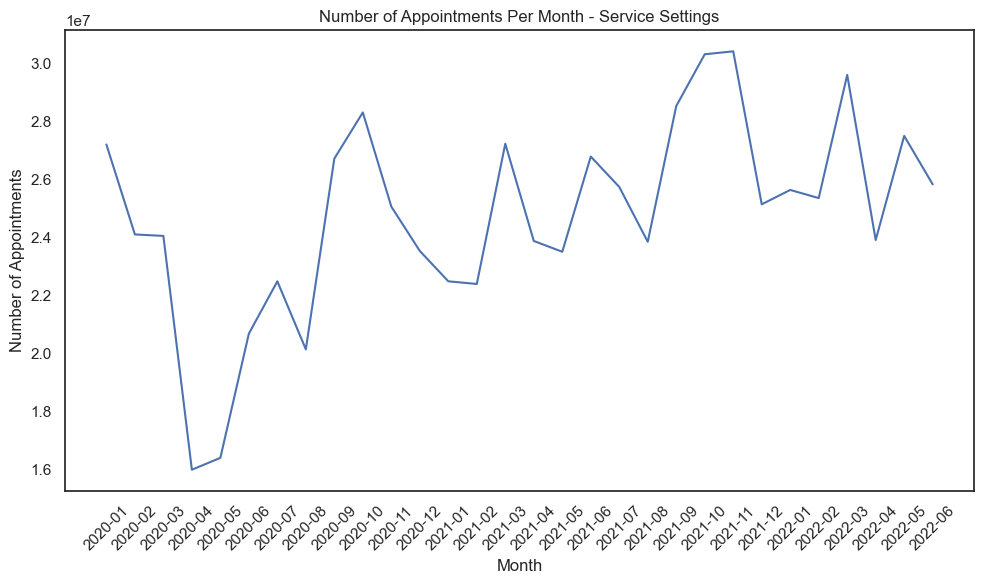

In [19]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_appointments_ar, x='appointment_month', y='count_of_appointments')
plt.title('Number of Appointments Per Month - Service Settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Context types:**

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


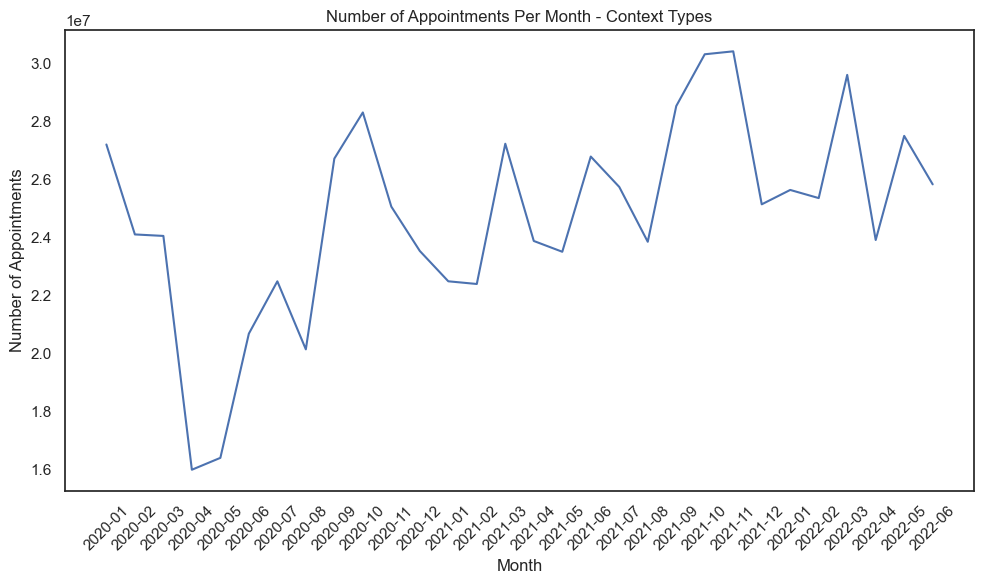

In [29]:
# Create a separate data set that can be used in future weeks. 
# View output.

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_appointments_ar, x='appointment_month', y='count_of_appointments')
plt.title('Number of Appointments Per Month - Context Types')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**National categories:**

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


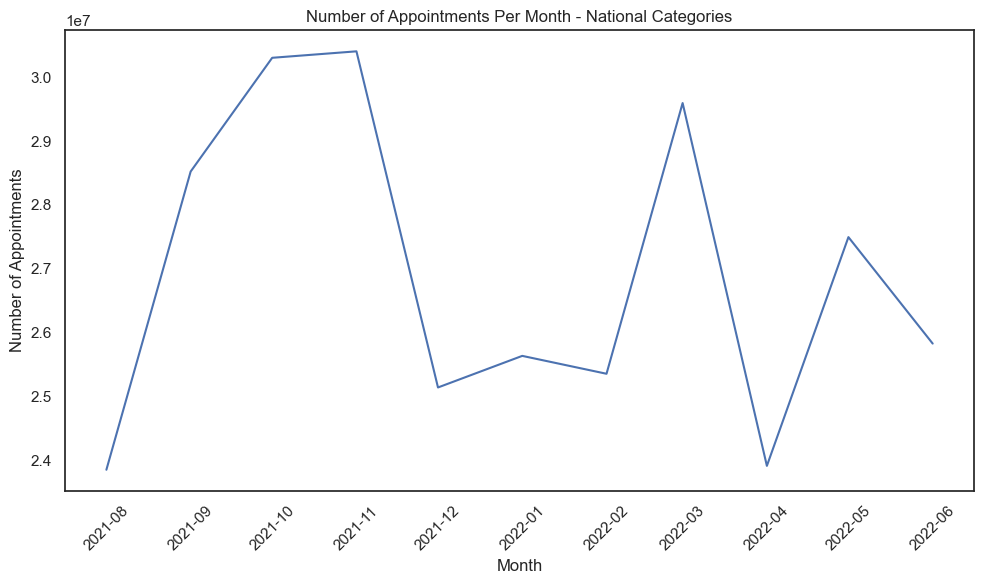

In [79]:
# Create a separate data set that can be used in future weeks. 
# View output.

# Ensure 'appointment_date' is a datetime object
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Extract the month and year from the date
nc['appointment_month'] = nc['appointment_date'].dt.to_period('M')

# Group by 'appointment_month' and sum the counts
monthly_appointments_nc = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Convert 'appointment_month' back to a datetime format for plotting
monthly_appointments_nc['appointment_month'] = monthly_appointments_nc['appointment_month'].dt.to_timestamp()


# Correcting the column used for the x-axis in the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_appointments_nc, x='appointment_month', y='count_of_appointments')
plt.title('Number of Appointments Per Month - National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Creating four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [35]:
# Create a separate data set that can be used in future weeks. 

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filter the data for June to August 2021

summer_2021_data = nc[(nc['appointment_date'] >= '2021-06-01') & (nc['appointment_date'] <= '2021-08-31')]

# View the output
summer_2021_data.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


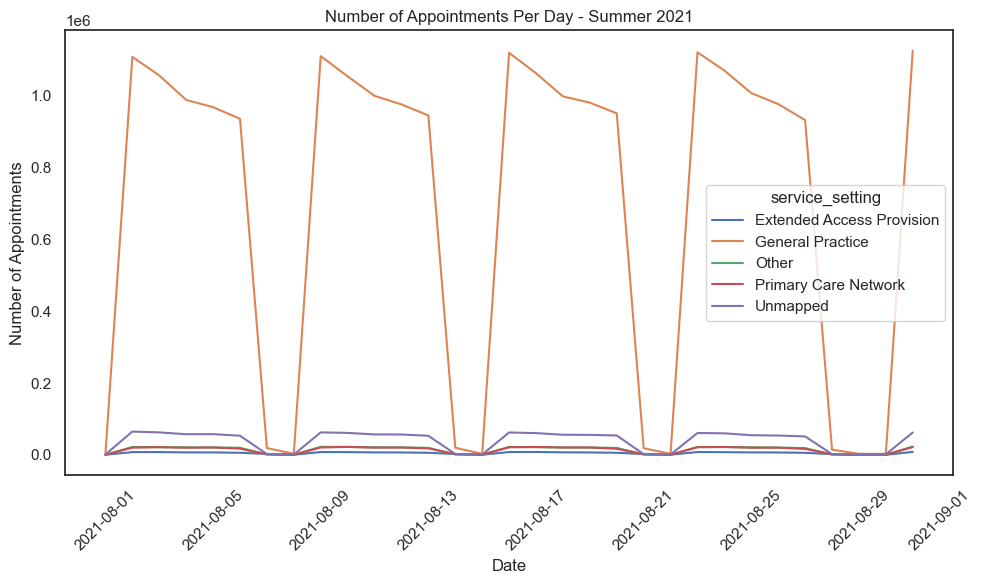

In [34]:
# Aggregate the data by service setting and date
summer_2021_grouped = summer_2021_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=summer_2021_grouped, x='appointment_date', y='count_of_appointments', hue='service_setting')
plt.title('Number of Appointments Per Day - Summer 2021')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Autumn (September to November 2021):**

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


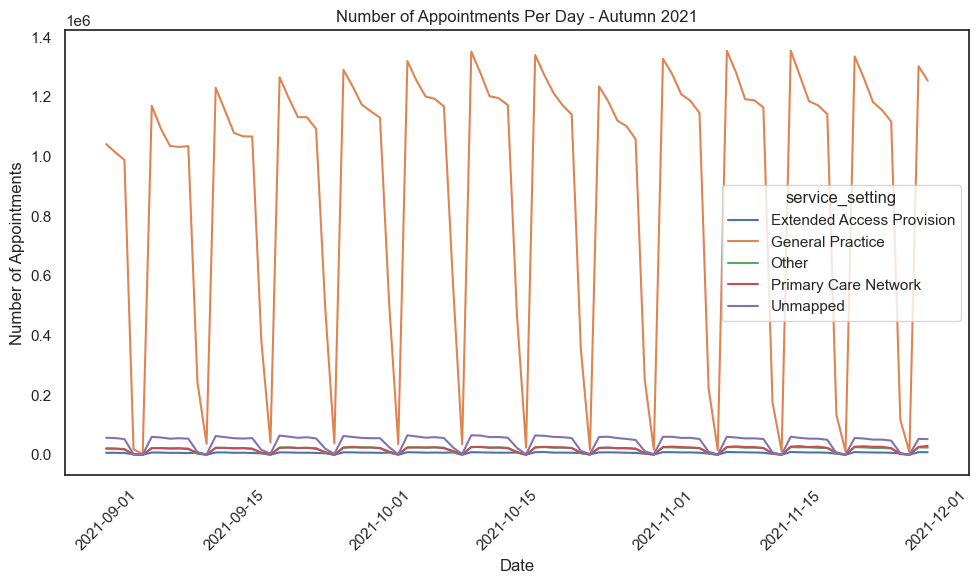

In [26]:
# Filter the data for the autumn months (September to November 2021)
autumn_2021_data = nc[(nc['appointment_date'] >= '2021-09-01') & (nc['appointment_date'] <= '2021-11-30')]

# Aggregate the data by service setting and date
autumn_2021_grouped = autumn_2021_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=autumn_2021_grouped, x='appointment_date', y='count_of_appointments', hue='service_setting')
plt.title('Number of Appointments Per Day - Autumn 2021')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Winter (December to February 2022):**

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


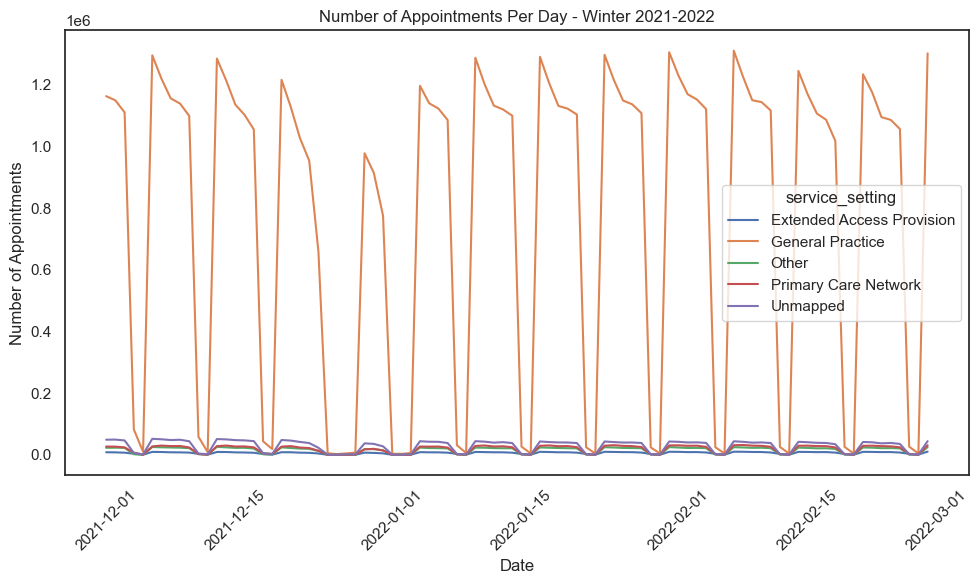

In [27]:
# Filter the data for the winter months (December 2021 to February 2022)
winter_2021_2022_data = nc[(nc['appointment_date'] >= '2021-12-01') & (nc['appointment_date'] <= '2022-02-28')]

# Aggregate the data by service setting and date
winter_2021_2022_grouped = winter_2021_2022_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=winter_2021_2022_grouped, x='appointment_date', y='count_of_appointments', hue='service_setting')
plt.title('Number of Appointments Per Day - Winter 2021-2022')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Spring (March to May 2022):**

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


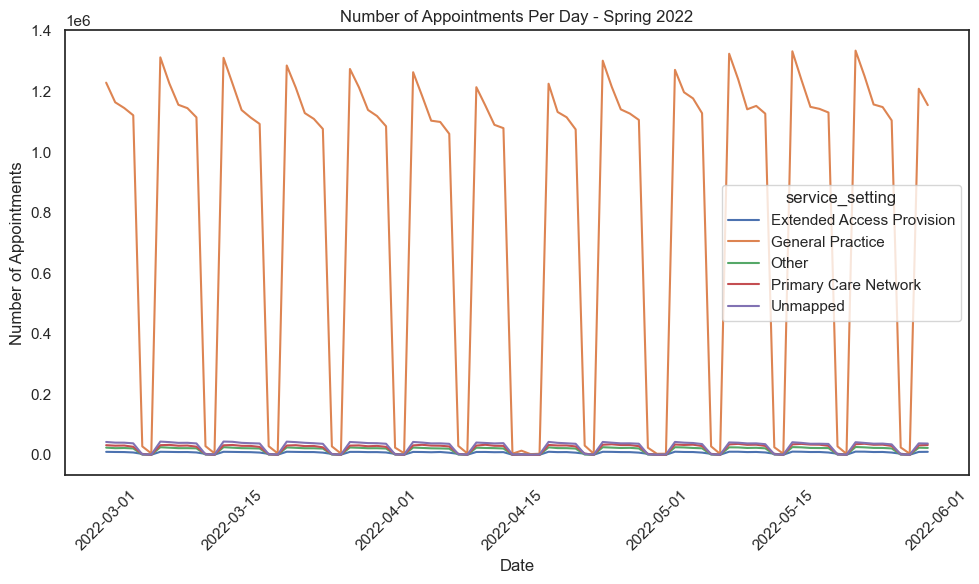

In [28]:
# Filter the data for the spring months (March to May 2022)
spring_2022_data = nc[(nc['appointment_date'] >= '2022-03-01') & (nc['appointment_date'] <= '2022-05-31')]

# Aggregate the data by service setting and date
spring_2022_grouped = spring_2022_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=spring_2022_grouped, x='appointment_date', y='count_of_appointments', hue='service_setting')
plt.title('Number of Appointments Per Day - Spring 2022')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Seasonal analysis.
    Consistent weekly pattern:
        All seasonal plots show a clear pattern. There are significant peaks during the start of the weeks and massive drop offs for the weekends. This was shown for all seasons.
    General Practice dominating across all seasons:
        Daily appointments for general practice are greatly higher than any other service setting. This suggests that general practices are the primary point of contact for patients in the healthcare service. Other settings such as "Primary Care Network" are needed much less.
    Stable appointment volumes: 
        No matter the season there always seems to be a very stable year to year volume in appointments. This suggests that factors such as seasonal sickness are suprisingly less likely to alter the number of scheduled appointments. This is most likely due to there being other health risks attributed to the summer such as heat stroke.
        
2. Monthly trends:
    National catagories:
        There are peaks observed around March 2022 and November 2021 which could be attributed to change in season. There is a decline around January and December likely attributed to the holiday season, less work stress and more family time.
    Context types:
        Shows variability across months with significant dips and rises
    Service settings:
        Shows variability similar to context types. Could be due to the pandemic.
        
3. CONCLUSION:
    Across the daily and monthly visualizations we see consistent patterns. General Practice is clearly the most used service in the NHS, being unaffected by seasonal changes but following a clear weekly cycle. The impact of external events, such as the COVID-19 pandemic, is also evident in the aggregated monthly data. These trends highlight the adaptability and resiliance of the healthcare service in mantaining consistent care despite varying external pressures.

# 

### Analysing tweets from Twitter with hashtags related to healthcare in the UK.

In [36]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [39]:
# Load the data set.

ts = pd.read_csv('tweets.csv')

# View the DataFrame.

ts.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [40]:
# Explore the metadata.

print(ts.info())
print(ts.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
            tweet_id  \
count   1.174000e+03   
unique           NaN   
top              NaN   
freq             NaN   
mean    1.567612e+18   
std     2.427553e+13   
min     1.567574e+18   


In [41]:
# Sense-check 

print(ts.columns)

print(ts.info())


Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(

In [44]:

# Create a new DataFrame containing only the text
ts_text = tweets[['tweet_full_text']]  

# View the DataFrame
ts_text.head()


,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


# Would it be useful to only look at retweeted and favourite tweet messages?

I think it would be useful to a certain degree. The pros are that it will remove the likelyhood of including botted and spam comments into the data. A con is that you remove some real opinions so the data doesnt paint the whole story.

In [49]:
# Function to extract hashtags from text
def extract_hashtags(text):
    # Split the text into words and filter those that start with '#'
    return [word for word in text.split() if word.startswith('#')]

# create a list of all hashtags
tags = []
ts_text['tweet_full_text'].dropna().apply(lambda x: tags.extend(extract_hashtags(x)))

# count occurrences
tags_count = pd.Series(tags).value_counts()

# Display first 30 records
tags_count.head(30)


#healthcare                    549
#Healthcare                    190
#health                         66
#HealthCare                     46
#AI                             43
#medicine                       42
#job                            38
#medical                        30
#strategy                       30
#pharma                         25
#digitalhealth                  25
#biotech                        25
#MedTwitter                     25
#competitiveintelligence        24
#pharmaceutical                 24
#marketing                      24
#MedEd                          23
#TipsForNewDocs                 21
#vaccine                        18
#Health                         18
#MachineLearning                17
#coronavirus                    16
#WomenInMedicine                16
#competitivemarketing           16
#hiring                         15
#healthcare.                    15
#telehealth                     14
#medicare                       14
#DoctorofVeterinaryM

In [50]:
# Convert the series to a DataFrame in preparation for visualization
tags_df = tags_count.reset_index()

# Rename the columns
tags_df.columns = ['Hashtag', 'Count']
tags_df.head()


,Hashtag,Count
0,#healthcare,549
1,#Healthcare,190
2,#health,66
3,#HealthCare,46
4,#AI,43


In [51]:
tags_df['Count'] = tags_df['Count'].astype(int)

# View the result to confirm datatype

tags_df.dtypes


Hashtag    object
Count       int32
dtype: object

In [52]:
# Display records where the count is larger than 10

tags_df_large = tags_df[tags_df['Count'] > 10]
tags_df_large


,Hashtag,Count
0,#healthcare,549
1,#Healthcare,190
2,#health,66
3,#HealthCare,46
4,#AI,43
5,#medicine,42
6,#job,38
7,#medical,30
8,#strategy,30
9,#pharma,25


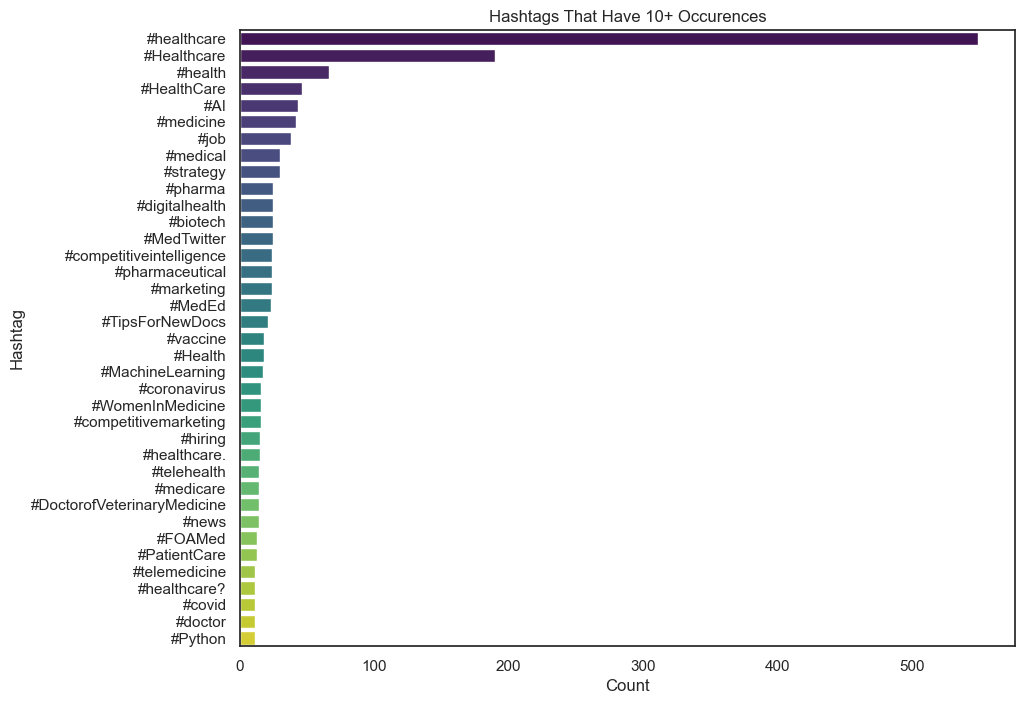

In [57]:
# Create a Seaborn barplot indicating records with a count >10 records
plt.figure(figsize=(10, 8))  # Set the figure size
sns.barplot(x='Count', y='Hashtag', data=tags_df_large, palette='viridis')  

# Give the plot labels and a title
plt.title('Hashtags That Have 10+ Occurences')
plt.xlabel('Count')
plt.ylabel('Hashtag')

# View the barplot
plt.show()


UTLIZING TWITTER FOR FEEDBACK AND ANALYSIS:

A. Tweets can provide feedback to stakeholders via real-time feedback on public perception. Monitoring specific hashtags can give a wide aray of different viewpoints to gain insight. Analysing trending topics, conversation frequency and sentiment towards the NHS can provide stakeholders with much needed information about commendments, concerns, and misunderstanding.

B. Tweets add significant value to the overall project by providing direct feedback straight from service users. This alleviates the need for surveys and the lack of honesty which can come from them. Tweets can also stakeholders understand the impact of certain campaigns through engagement and response rates.

C. The NHS can utilize tweets to engage directly with the public by giving service, emergency and personal updates to a wide aray of people. Furthermore they can gauge public on certain camptaigns or its service as a whole. 

D. In order to improve future data based campaigns the NHS should:
    a. Regularly monitor mentions, hashtags and buzz words.
    b. Track engagement such as likes, retweets and replies.
    c. Attempt to find sentiment of tweets.
    d. Attempt to find demographic of those who have specific sentiment.
    e. After all of this data is collected use it to base campaigns in the future.
    
SUMMARY:

Hashtag healthcare is the most widely found hashtag in the data, with similar hashtags being found in a high percent of the data. This does suggest that the data needs cleaning however due to similar

Other hashtags that are frequent are #Pharma, #AI, #Digitalhealth which shows public interest in the posible innovation of the healthcare system and what is actually being done.

Employement related hashtags also are found which show that future healthcare professionals use social media to learn about their future job.

RECOMMENDATIONS:

Have a deeper look into specific groups of hashtags such as #AI, #MachineLearning or #Coronavoris, #Vaccine to understand the trends and sentiments towards each in regards to the healthcare system

Highlight career oppoturnies, educational resources in tweets due to the high usage of career related #

Clean data to reduce redundancy by merging variations which will enhance the accuracy of the analysis.

interactive visualizations

Geospatial analysis on specific locations in the country.

# 

### Recommendations to the NHS. 

In [58]:
# convert to datetime

ar['appointment_date'] = pd.to_datetime(ar['appointment_date'])
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filter data from August 2021 onwards
ar_filtered = ar[ar['appointment_date'] >= '2021-08-01']
nc_filtered = nc[nc['appointment_date'] >= '2021-08-01']

# View the filtered DataFrame
print(ar_filtered.head())
print(nc_filtered.head())


     icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034           2021-08           Attended       GP   
3653    E54000034           2021-08           Attended       GP   
3654    E54000034           2021-08           Attended       GP   
3655    E54000034           2021-08           Attended       GP   
3656    E54000034           2021-08           Attended       GP   

     appointment_mode time_between_book_and_appointment  \
3652     Face-to-Face                             1 Day   
3653     Face-to-Face                    15  to 21 Days   
3654     Face-to-Face                       2 to 7 Days   
3655     Face-to-Face                    22  to 28 Days   
3656     Face-to-Face                     8  to 14 Days   

      count_of_appointments appointment_date  
3652                   6553       2021-08-01  
3653                   2390       2021-08-01  
3654                  10547       2021-08-01  
3655                    937       2021-08-01  
3656   

### Should the NHS start looking at increasing staff levels? 

In [59]:
# Aggregate the data by month

ar_aggregated = ar_filtered.groupby('appointment_month').agg({'count_of_appointments': 'sum'}).reset_index()

# View the aggregated DataFrame
print(ar_aggregated.head())


  appointment_month  count_of_appointments
0           2021-08               23852171
1           2021-09               28522501
2           2021-10               30303834
3           2021-11               30405070
4           2021-12               25140776


In [60]:
# Calculate the average utilization
ar_aggregated['utilisation'] = (ar_aggregated['count_of_appointments'] / 30) / 1200000 * 100

# Round the utilization to one decimal place
ar_aggregated['utilisation'] = ar_aggregated['utilisation'].round(1)

# View the DataFrame with the utilization column
print(ar_aggregated.head())



  appointment_month  count_of_appointments  utilisation
0           2021-08               23852171         66.3
1           2021-09               28522501         79.2
2           2021-10               30303834         84.2
3           2021-11               30405070         84.5
4           2021-12               25140776         69.8


C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


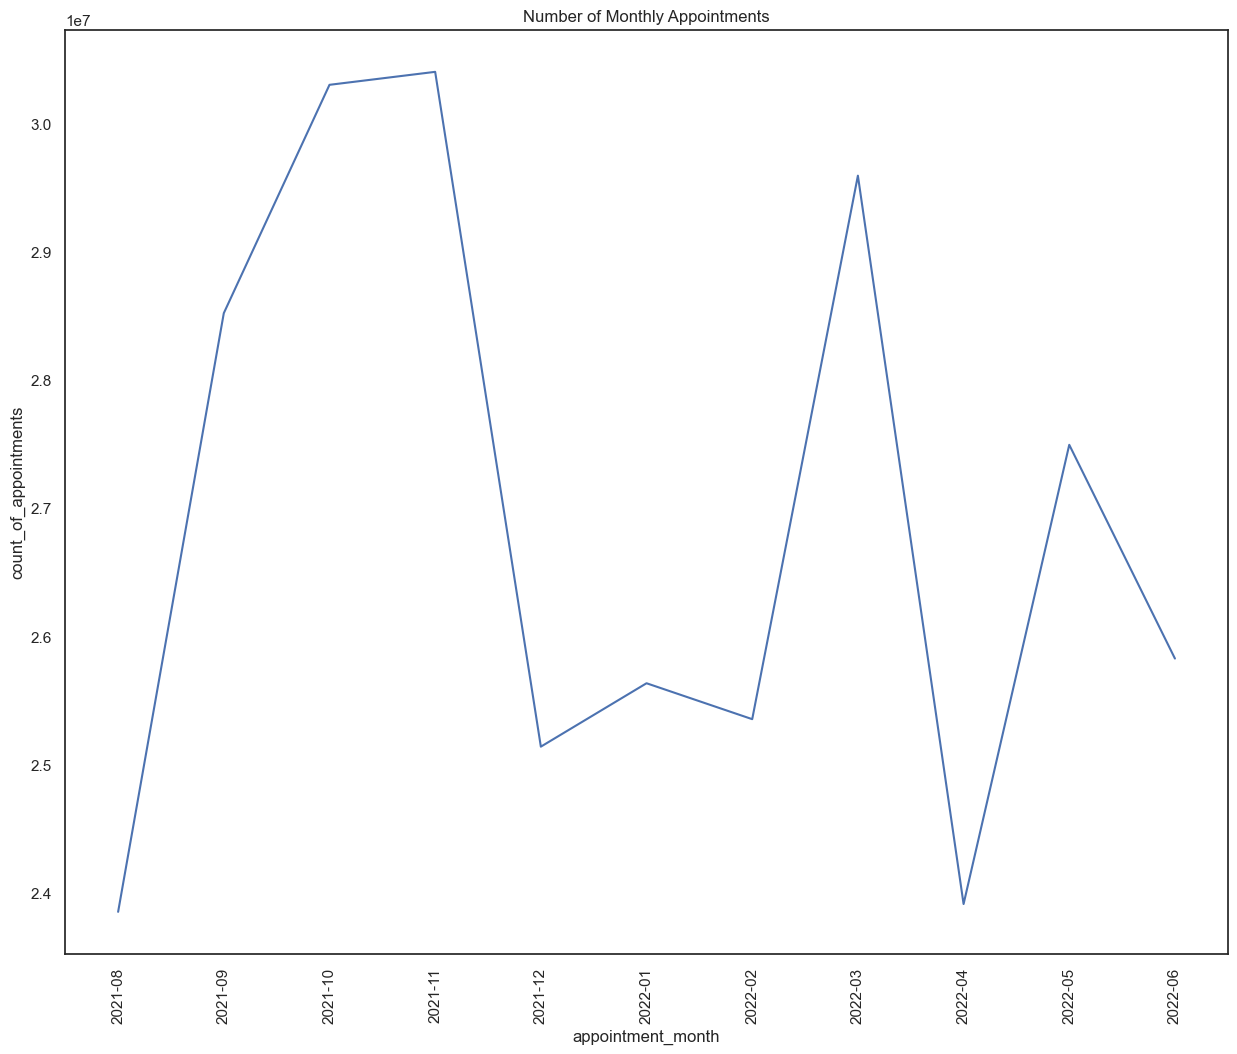

In [61]:
# Convert appointment_month to string

ar_aggregated['appointment_month'] = ar_aggregated['appointment_month'].astype(str)

# Plot number of monthly visits

sns.lineplot(data=ar_aggregated, x='appointment_month', y='count_of_appointments')
plt.xticks(rotation=90)
plt.title('Number of Monthly Appointments')
plt.show()

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


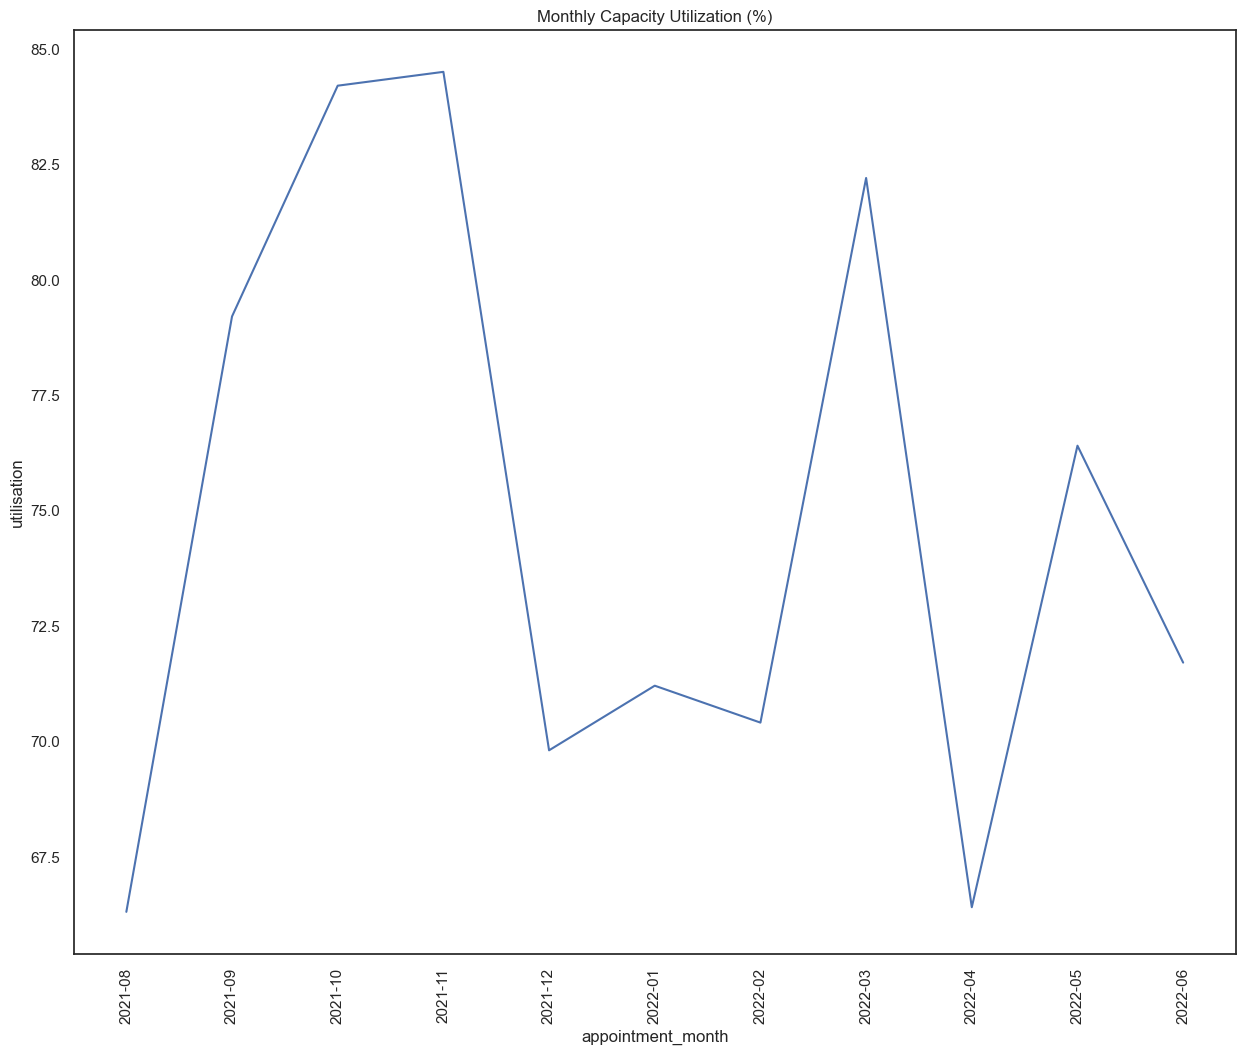

In [62]:
# Plot monthly capacity utilization
sns.lineplot(data=ar_aggregated, x='appointment_month', y='utilisation')
plt.xticks(rotation=90)
plt.title('Monthly Capacity Utilization (%)')
plt.show()

### How do the healthcare professional types differ over time?

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


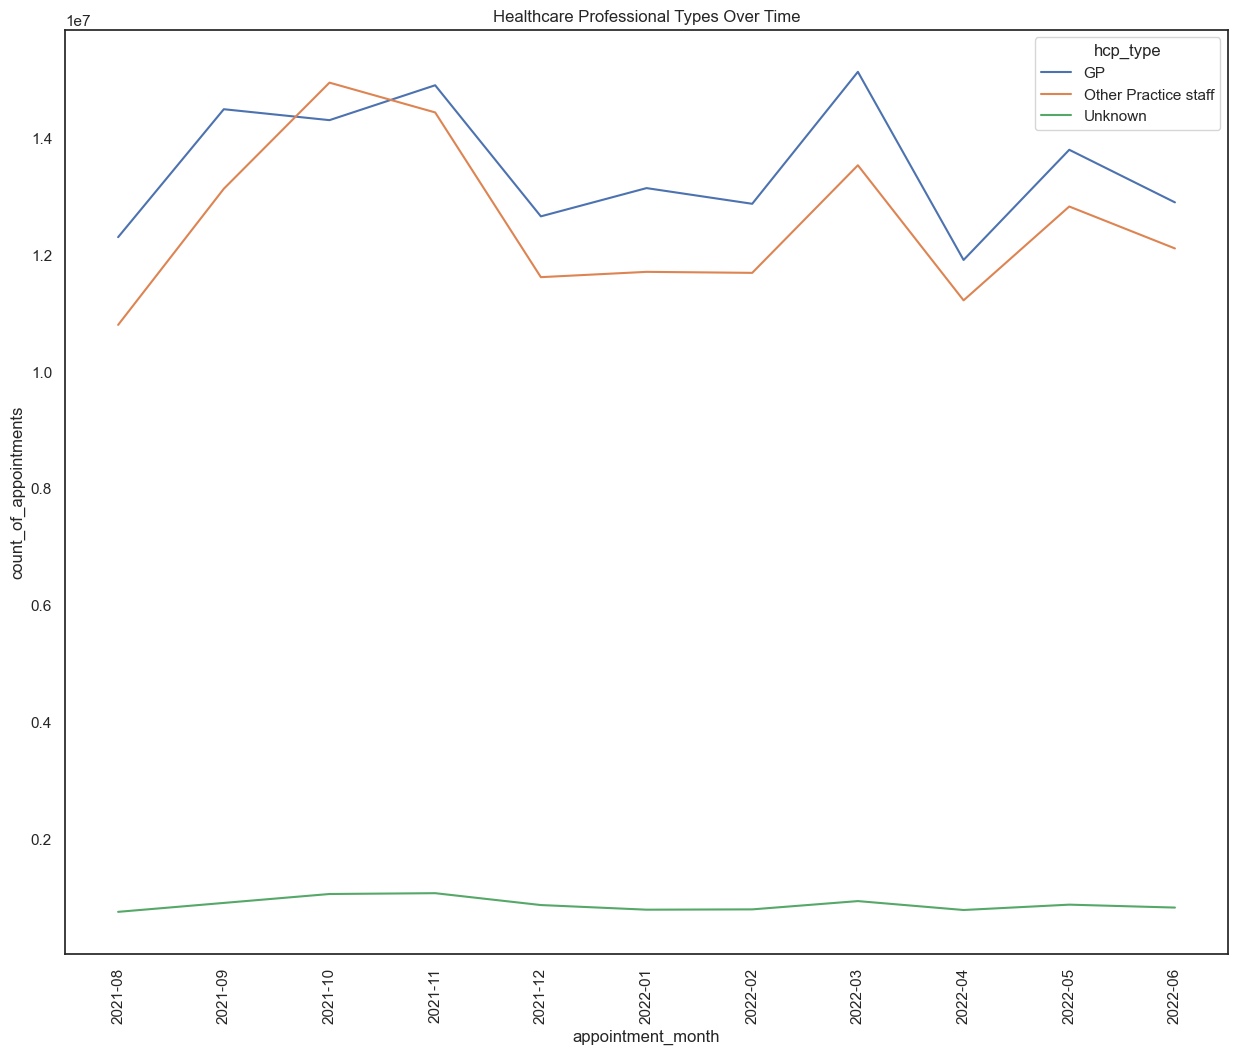

In [63]:
# Aggregate the data by appointment month and healthcare professional type

hcp_aggregated = ar_filtered.groupby(['appointment_month', 'hcp_type']).agg({'count_of_appointments': 'sum'}).reset_index()

# Convert appointment_month to string for better visualization

hcp_aggregated['appointment_month'] = hcp_aggregated['appointment_month'].astype(str)

# Create a line plot to show the differences in healthcare professional types over time

sns.lineplot(data=hcp_aggregated, x='appointment_month', y='count_of_appointments', hue='hcp_type')
plt.xticks(rotation=90)
plt.title('Healthcare Professional Types Over Time')
plt.show()


### Are there significant changes in whether or not visits are attended?

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


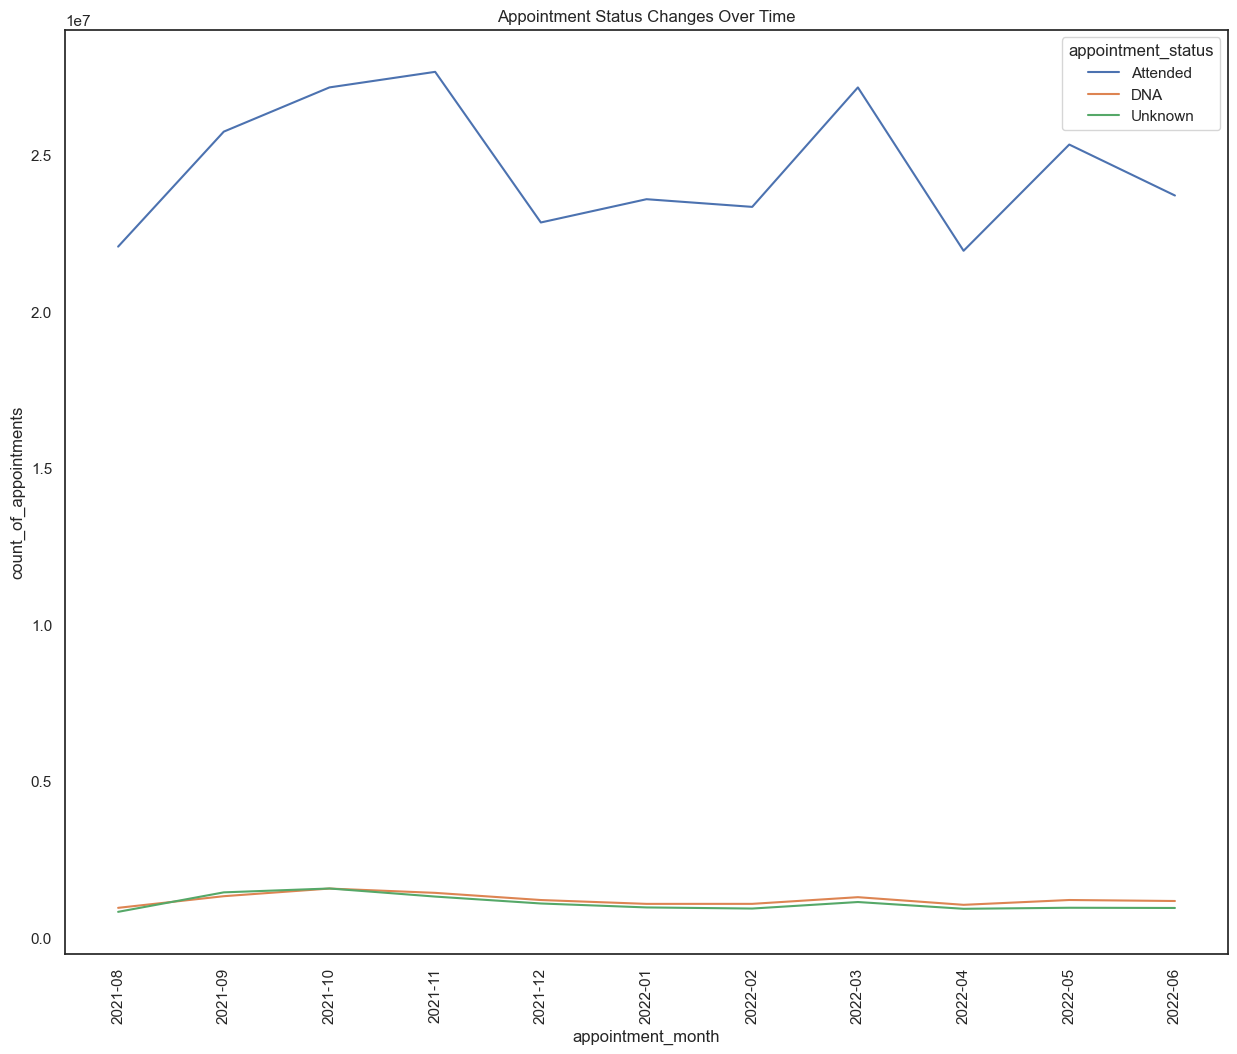

In [64]:
# Aggregate the data by appointment month and appointment status

status_aggregated = ar_filtered.groupby(['appointment_month', 'appointment_status']).agg({'count_of_appointments': 'sum'}).reset_index()

# Convert appointment_month to string for better visualization

status_aggregated['appointment_month'] = status_aggregated['appointment_month'].astype(str)

# Create a line plot to show the changes in appointment status over time

sns.lineplot(data=status_aggregated, x='appointment_month', y='count_of_appointments', hue='appointment_status')
plt.xticks(rotation=90)
plt.title('Appointment Status Changes Over Time')
plt.show()


### Are there changes in terms of appointment type and the busiest months?

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


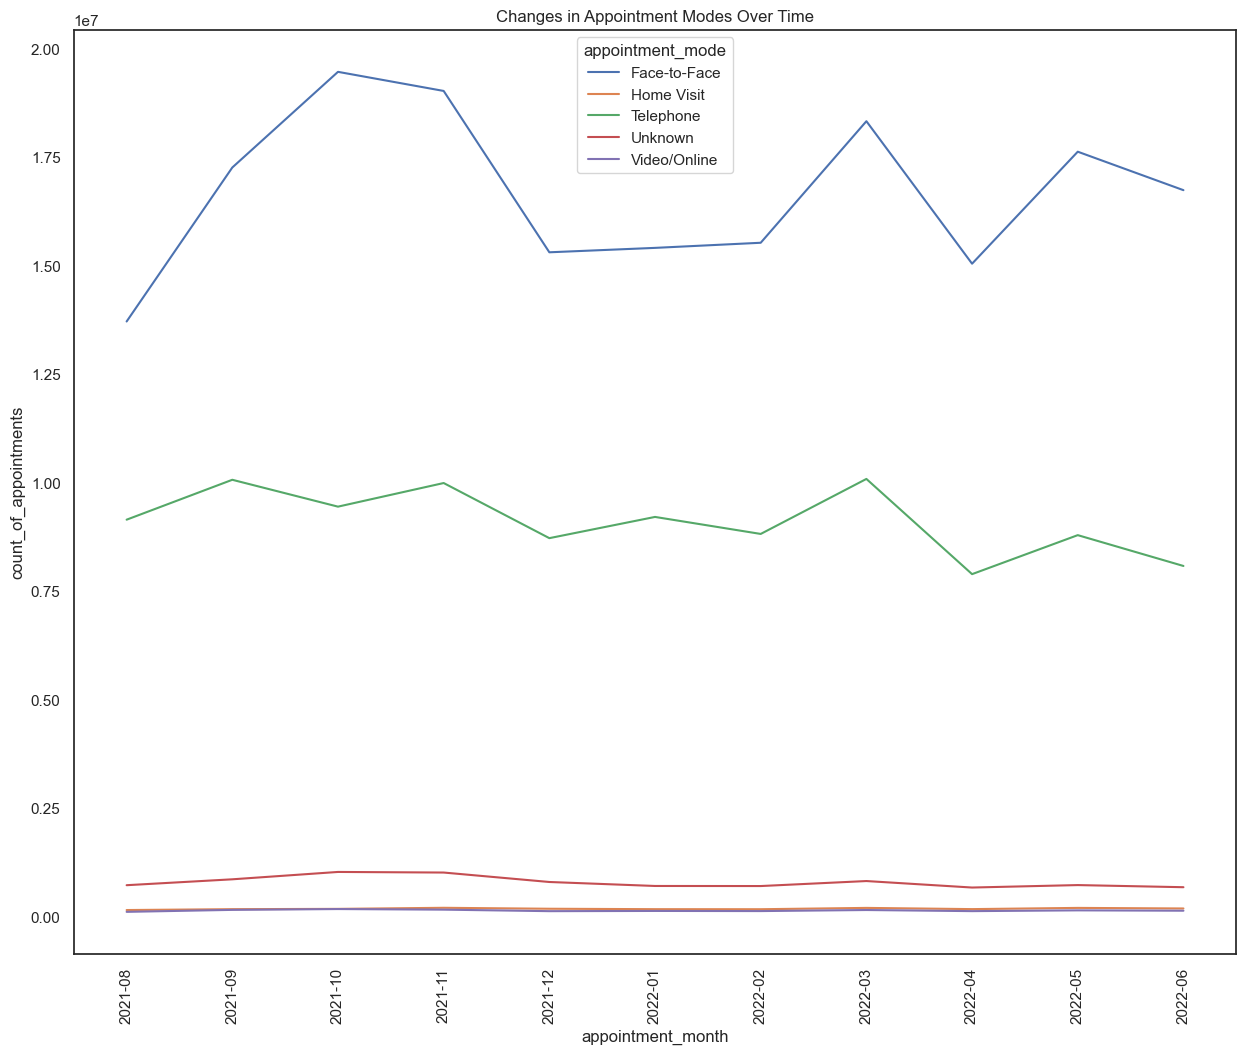

In [65]:
# Aggregate the data by appointment month and appointment mode

mode_aggregated = ar_filtered.groupby(['appointment_month', 'appointment_mode']).agg({'count_of_appointments': 'sum'}).reset_index()

# Convert appointment_month to string for better visualization

mode_aggregated['appointment_month'] = mode_aggregated['appointment_month'].astype(str)

# Create a line plot to show the changes in appointment modes over time

sns.lineplot(data=mode_aggregated, x='appointment_month', y='count_of_appointments', hue='appointment_mode')
plt.xticks(rotation=90)
plt.title('Changes in Appointment Modes Over Time')
plt.show()


### Are there any trends in time between booking and appointment?

C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gianf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


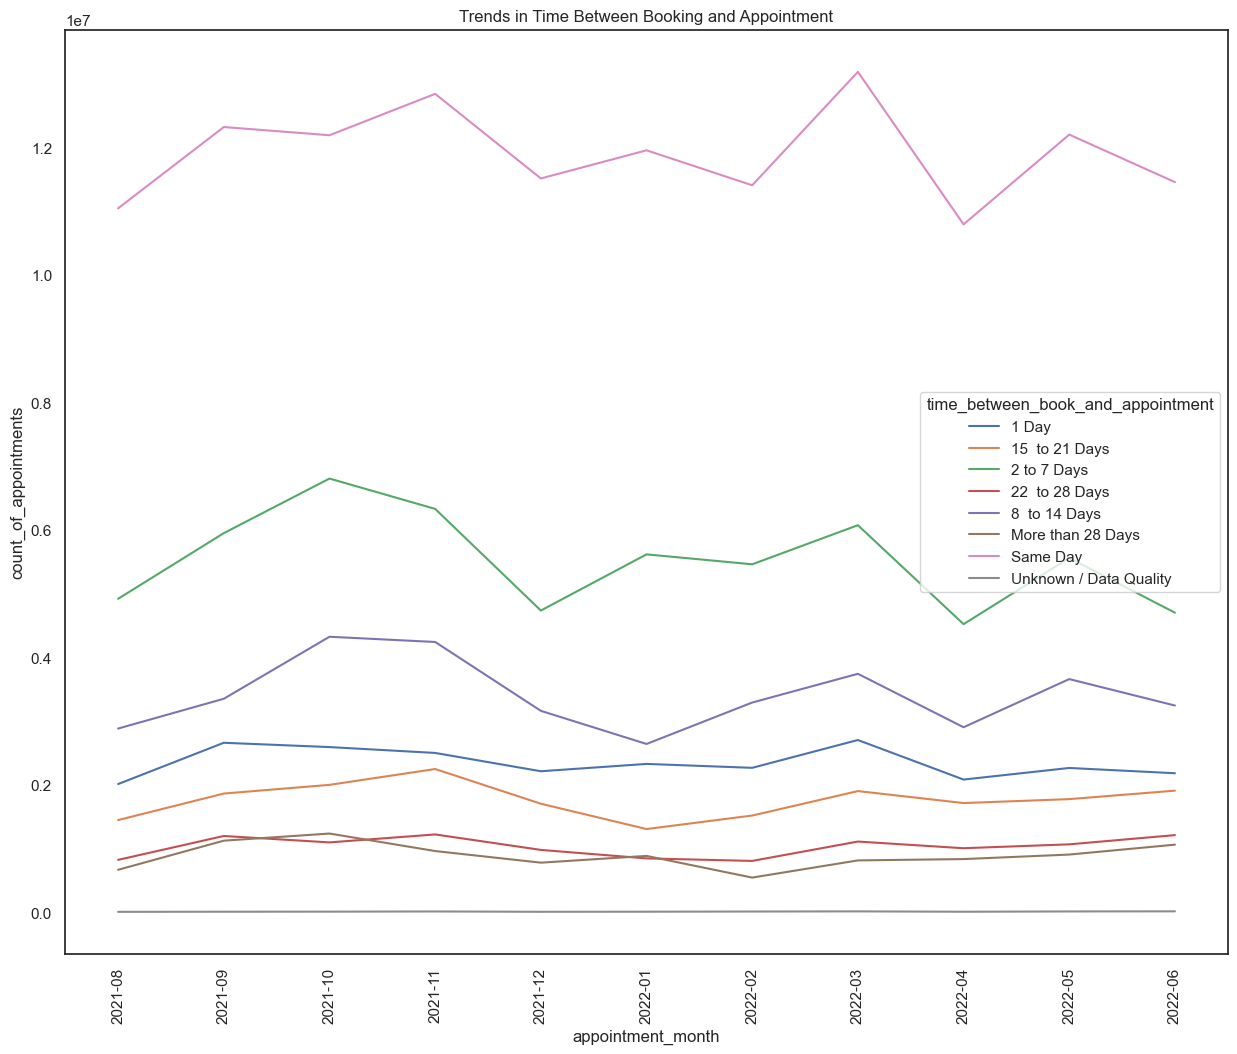

In [66]:
# Aggregate the data by appointment month and time between booking and appointment

time_trend = ar_filtered.groupby(['appointment_month', 'time_between_book_and_appointment']).agg({'count_of_appointments': 'sum'}).reset_index()

# Convert appointment_month to string for better visualization

time_trend['appointment_month'] = time_trend['appointment_month'].astype(str)

# Create a line plot to show trends in time between booking and appointment

sns.lineplot(data=time_trend, x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment')
plt.xticks(rotation=90)
plt.title('Trends in Time Between Booking and Appointment')
plt.show()


### How do the various service settings compare?

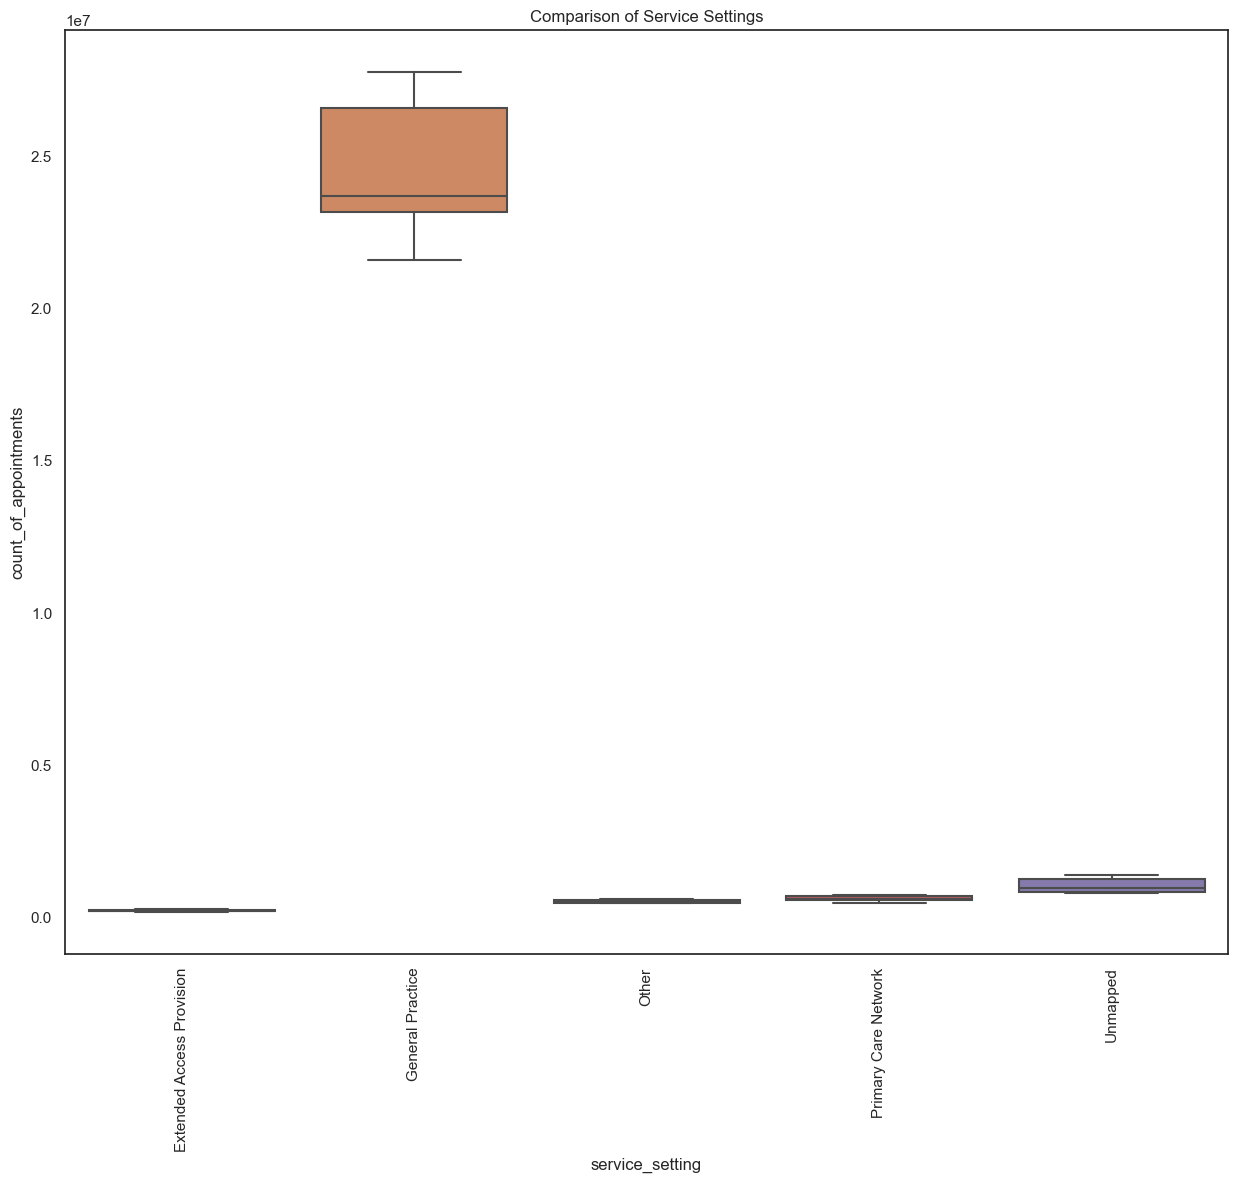

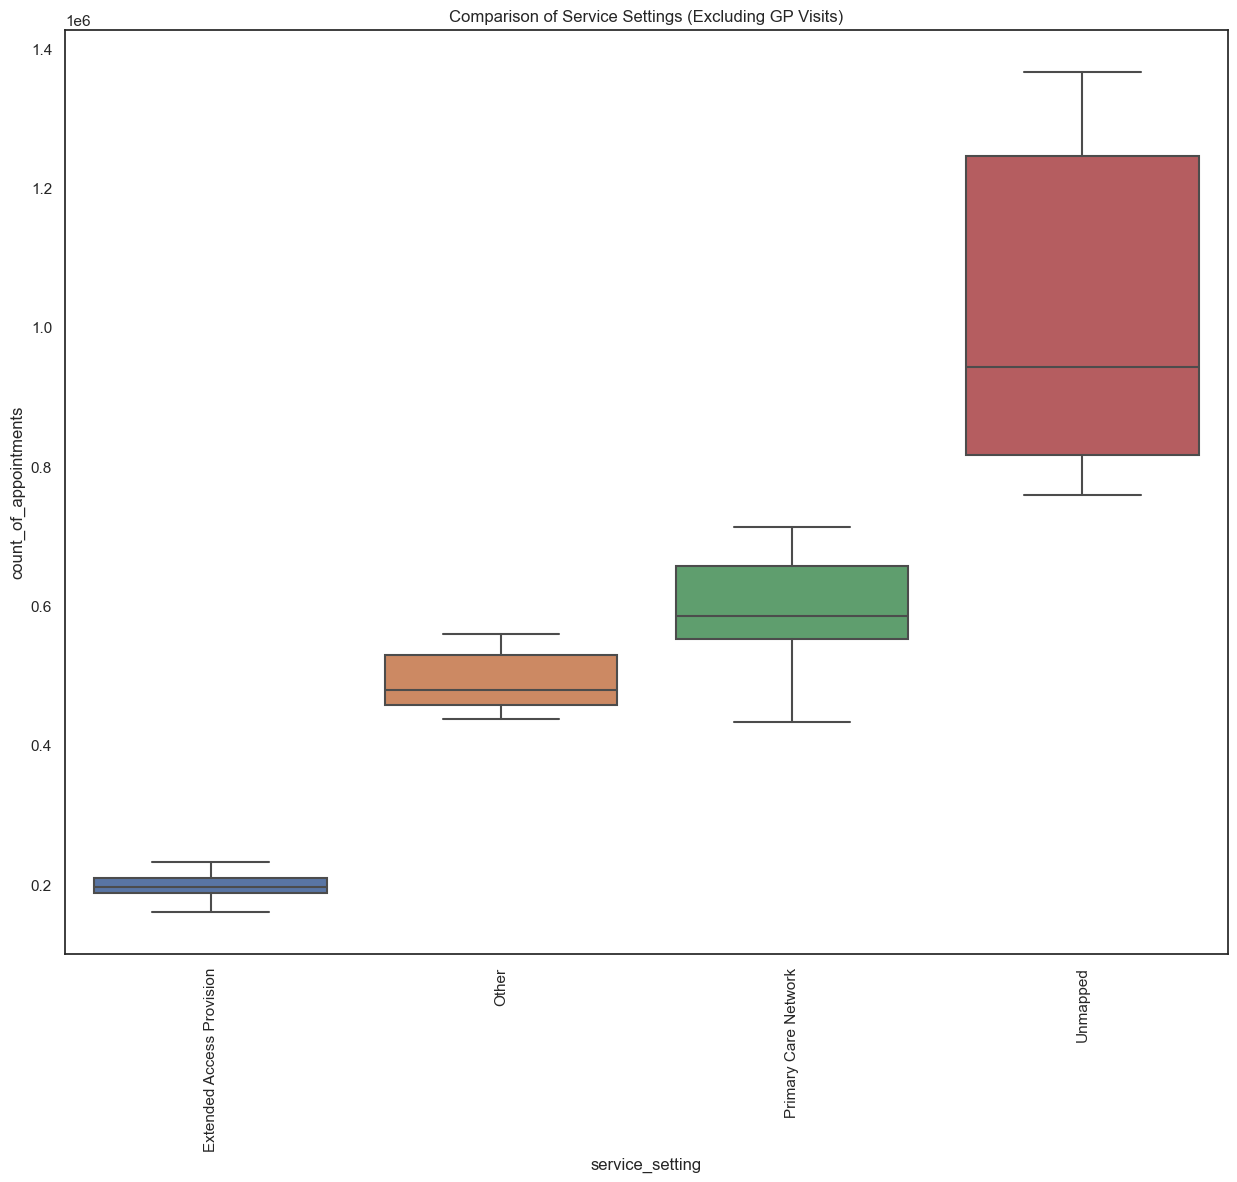

In [67]:
# Group the data by service setting and month

service_aggregated = nc_filtered.groupby(['appointment_month', 'service_setting']).agg({'count_of_appointments': 'sum'}).reset_index()

# Convert appointment_month to string for better visualization

service_aggregated['appointment_month'] = service_aggregated['appointment_month'].astype(str)

# Create a boxplot to show the comparison of service settings

sns.boxplot(data=service_aggregated, x='service_setting', y='count_of_appointments')
plt.xticks(rotation=90)
plt.title('Comparison of Service Settings')
plt.show()

# Create a boxplot excluding GP visits

service_no_gp = service_aggregated[service_aggregated['service_setting'] != 'General Practice']
sns.boxplot(data=service_no_gp, x='service_setting', y='count_of_appointments')
plt.xticks(rotation=90)
plt.title('Comparison of Service Settings (Excluding GP Visits)')
plt.show()


# 

### Providing a summary of findings and recommendations based on the analysis.

1. Number of monthly appointments:

The plot shows significant flunctuations of appointments over the time period, namely with peaks in october 2021 and march 2022, and a noticable drop in April 2022 and over the christmas/new year period. The reasons behind this variability are most likely: holidays which shows school/work leads to higher chance of appoinments, seasonal illness' and policy changes.

2. Monthly Capacity Utilization:

The plot follows the monthly appointment graph very closely, with its utilization peaking at around 85% in October 2021, and dropping to roughly 70% during the christmas/new years months. This is likely due to the fact that the doctors surgeries see people going on holidays, or have low motivation, during the periods of low utlization which seems to be the root causes.

3. Healthcare Professional Types Over Time:

This plot suggests that GPs handle the majority of appointments, with "other practice staff" such as nurses contributing towards less but still a high amount of appointments. The trend is fairy stable and has only seen one change where other practice staff actually overtook the GP.

4. Appointment Status Changes Over Time:

This plot shows whether patients attended their appointment or not. The trend of the bulk of people attending has remained pretty stable with slight dips towards 2022-06

5. Changes In Appointment Modes Over Time:

Face-to-face dominates the other data in this plot, with telephone appointments following closely behind. Other modes such as home visits or video calls are significantly lower.

6. Time between booking and appointment:

In this plot the "Same Day" appointment type was by far the most common, fluctuating in line with the other appointment changes and amounts. "2 to 7 days" and "8 to 14 days" categories consistently are the next most common. This shows that almost all patients are seen within 21 days but the fact that "more than 28 days" and "22 to 28 days" are still high is concerning

7. Comparison Of Service Setting

This plot shows that all the settings are differently utilized with GP practices being the most common.